# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2025
## Lab 8: Gordus 
## April 18, 2025

#  Lineweaver-Burk Plot

The goal here will be to perform a linear regression. As mentioned earlier in the semester, a linear regression has an analytical solution, unlike a non-linear fit, which is numerically solved recursively. We will use the linear regression to estimate the K<sub>M</sub> and V<sub>max</sub>.

## Libraries you will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Michaelis-Menten Kinetics

Measuring enzyme kinetics often involves developing an assay where you can measure the initial rate of an enzymatic reaction (typically through a fluorescent readout) at different concentrations of substrate. The simples model of enzyme kinetics is for a second-order reaction where an enzyme binds a single substrate (A), and produces a product (P):

![kinetics](https://wikimedia.org/api/rest_v1/media/math/render/svg/02a24d41daa267c3a150de51e8fcbb0ad7d5e2fb)

This is considered a second-order reaction because the rate of the reaction (dP/dt) is the product of the enzyme (E), the substrate (S) and the catalytic rate constant (k<sub>cat</sub>).

<img src="http://www.gordus.org/public_images/dP.png" alt="Drawing" style="height: 50px;"/>
<img src="http://www.gordus.org/public_images/dEA.png" alt="Drawing" style="height: 50px;"/>
<img src="http://www.gordus.org/public_images/dA.png" alt="Drawing" style="height: 50px;"/>
<img src="http://www.gordus.org/public_images/dE.png" alt="Drawing" style="height: 50px;"/>

**Michaelis-Menten Assumption #1: [E]<<[A]**

Integrating these coupled differential equations is possible, but beyond the scope of this class. Fortunately, Michaelis and Menten didn't want to put up with this headache either, so they designed their experiments so that [E] << [A]. By doing this, they essentially converted this second-order reaction into a first-order reaction, because there is SO MUCH A relative to E, that during the course of measuring product formation (P), A hardly changes at all. In other words:

<img src="http://www.gordus.org/public_images/dA0.png" alt="Drawing" style="height: 50px;"/>

**Michaelis-Menten Assumption #2: [EA] is at steady-state**

A second assumption is that when you measure the rate of product formation, you are doing this under conditions where the bound form of the enzyme (EA) is under steady state, in part because of the excess amount of A being used, relative to E. The steady-state assumption assumes:

<img src="http://www.gordus.org/public_images/dEA0.png" alt="Drawing" style="height: 50px;"/>

**Deriving Michaelis-Menten Step #1: Substitute E with E<sub>total</sub> - EA**

The total amount of enzyme in the reaction is the sum of the free and bound forms of enzyme, i.e.:

<img src="http://www.gordus.org/public_images/E.png" alt="Drawing" style="height: 35px;"/>

The first step to deriving the Michaelis-Menten equation is to replace [E] in the equation above with [E<sub>total</sub>]-[EA]

**Deriving Michaelis-Menten Step #2: Solve for EA**

Once you set dEA/dt to zero, and replace [E] in the equation above with [E<sub>total</sub>]-[EA], you can solve for [EA]:

<img src="http://www.gordus.org/public_images/EA1.png" alt="Drawing" style="height: 60px;"/>

If you divide the numerator and denominator on the right side by k<sub>+1</sub>, you get:

<img src="http://www.gordus.org/public_images/EA2.png" alt="Drawing" style="height: 65px;"/>

**Deriving Michaelis-Menten Step #3: K<sub>M</sub> and V<sub>max</sub> substitutions**

If you make the following substitutions:

<img src="http://www.gordus.org/public_images/KM2.png" alt="Drawing" style="height: 50px;"/>

<img src="http://www.gordus.org/public_images/Vmax.png" alt="Drawing" style="height: 35px;"/>

and plug this:

<img src="http://www.gordus.org/public_images/EA2.png" alt="Drawing" style="height: 65px;"/>

into this:

<img src="http://www.gordus.org/public_images/dP.png" alt="Drawing" style="height: 50px;"/>

you will arrive at this:

<img src="http://www.gordus.org/public_images/MM.png" alt="Drawing" style="height: 70px;"/>

This is the Michaelis-Menten Equation. You have converted a second-order equation into a first-order one, because now the rate of product formation is a function of A, rather than E and A.

## Lineweaver-Burk Plot

Nowadays, if you want to measure the binding constant (K<sub>M</sub>) and catalytic constant (V<sub>max</sub>=k<sub>cat</sub>[E<sub>total</sub>]), you would just fit the above equation to measured data using a recursive nonlinear fit function (like we've used in the past!). However, a simple way to measure the enzyme parameters is to simply invert the Michaelis-Menten equation:

<img src="http://www.gordus.org/public_images/LB.png" alt="Drawing" style="height: 65px;"/>

and then plot 1/v as a function of 1/[A].

We will do that here to practice using Python to solve a linear regression.

## Linear Regression

For a linear regression, you have:

**x: independent data**

**y: dependent data**

You want to build a function:

**y_predict = y_intercept + slope*x**

where the difference between y and y_predict is minimal. The linear algebra involved in doing this operation is called a linear regression.

## Linear Regression in Python

An easy regression function to use in Python is `LinearRegression.fit(x,y)`

To calculate the slope and y-intercept, execute the code in the following manner:

`reg = LinearRegression().fit(x, y)`

`slope = reg.coef_[0]`

`y_intercept = reg.intercept_`

An **IMPORTANT** detail:

The x array **MUST** be a column vector for the linear regression function to work. Here is an example of how to promote a row vector into a column vector:

In [2]:
# x is a row vector
x = np.array([1,2,3,4,5])
print(x)
print('x dimensions: '+str(x.shape))

# x is a COLUMN vector
x = x[...,None]

print(x)
print('x dimensions: '+str(x.shape))



[1 2 3 4 5]
x dimensions: (5,)
[[1]
 [2]
 [3]
 [4]
 [5]]
x dimensions: (5, 1)


# Problem 2.1:

You prepare an enzyme reaction where you use the following concentrations of substrate ($\mu$M):

[0.3, 1, 3, 10, 30]

And observe the following rates ($\mu$M s<sup>-1</sup>) without inhibitor:

[0.127, 0.353, 0.720, 1.132, 1.353]

And with inhibitor:

[0.099, 0.198, 0.277, 0.322, 0.337]


Prepare a Lineweaver-Burk plot of both data sets. The plots should show the individual data points as well as an appropriate fit. To plot your fit (regression line) to the data, you will need to plot:

**y_predict = y_intercept + slope*x**

from your regression. You can then use this information to calculate the V<sub>max</sub> and K<sub>M</sub>.

Make sure to label the axes, including units, and report the fitting parameters that you obtain.

## <font color='red'>Student Input Cell: 20 points</font>

Slope (No Inhibitor): 2.1620029349528327
Y Intercept (No Inhibitor): 0.6681284530341616
Vmax (No Inhibitor): 1.4967181766600648
KM (No Inhibitor): 3.235909090736312
Slope (No Inhibitor): 2.1628155444421404
Y Intercept (No Inhibitor): 2.8906115907997756
Vmax (Inhibitor): 0.3459475507476671
KM (Inhibitor): 0.7482207403187405


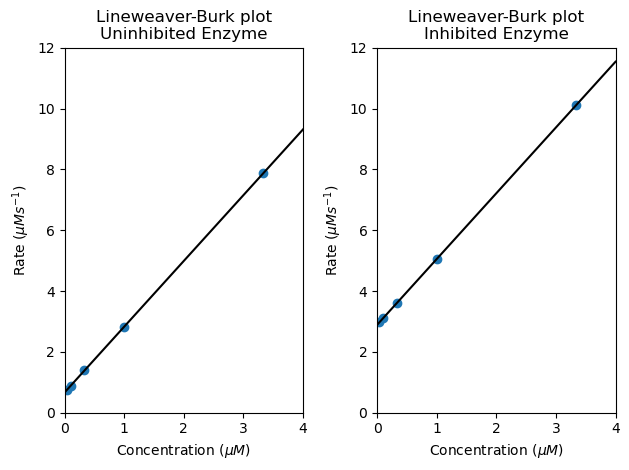

In [3]:
concentration = np.array([0.3, 1, 3, 10, 30])
rates = np.array([0.127, 0.353, 0.720, 1.132, 1.353])
ratesWithInhibitor = np.array([0.099, 0.198, 0.277, 0.322, 0.337])

def findABLine(x, y):
    # Transpose rows to column vectors
    x = x[...,None]
    y = y[...,None]
    reg = LinearRegression().fit(x,y)
    slope = reg.coef_[0][0]
    y_intercept = reg.intercept_[0]
    return slope, y_intercept

slope, y_intercept = findABLine(1/concentration,1/rates)
print(f"Slope (No Inhibitor): {slope}")
print(f"Y Intercept (No Inhibitor): {y_intercept}")
print(f"Vmax (No Inhibitor): {1/y_intercept}")
print(f"KM (No Inhibitor): {slope/y_intercept}")
slopeWithInhibitor, y_interceptWithInhibitor = findABLine(1/concentration,1/ratesWithInhibitor)
print(f"Slope (No Inhibitor): {slopeWithInhibitor}")
print(f"Y Intercept (No Inhibitor): {y_interceptWithInhibitor}")
print(f"Vmax (Inhibitor): {1/y_interceptWithInhibitor}")
print(f"KM (Inhibitor): {slopeWithInhibitor/y_interceptWithInhibitor}")

fig, axs = plt.subplots(1, 2)
axs[0].scatter(1/concentration,1/rates)
axs[0].set_title("Lineweaver-Burk plot\nUninhibited Enzyme")
axs[0].set_ylabel("Rate ($\\mu Ms^{-1}$)")
axs[0].set_xlabel("Concentration ($\\mu M$)")
axs[0].axline((0,y_intercept),slope=slope,c='k')
axs[0].set_ylim(0,12)
axs[0].set_xlim(0,4)
axs[1].scatter(1/concentration,1/ratesWithInhibitor)
axs[1].set_title("Lineweaver-Burk plot\nInhibited Enzyme")
axs[1].set_ylabel("Rate ($\\mu Ms^{-1}$)")
axs[1].set_xlabel("Concentration ($\\mu M$)")
axs[1].axline((0,y_interceptWithInhibitor),slope=slopeWithInhibitor,c='k')
axs[1].set_ylim(0,12)
axs[1].set_xlim(0,4)
plt.tight_layout()
plt.show()

## <font color='red'>Student Input Cell: 10 points</font>


Did the inhibitor weaken (increase) or strengthen (decrease) the K<sub>M</sub> ? <br>
Did it increase or decrease the V<sub>max</sub>?

The inhibitor strengthened the $\ K_M$ and decreased $\ V_{max}$.